In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# loading data
data_path = 'turboaz.csv'

load_data = pd.read_csv(data_path)
extr_data = pd.DataFrame(load_data)
extr_data = extr_data[["Yurush", "Buraxilish ili", "Qiymet"]]

print(extr_data)

          Yurush  Buraxilish ili     Qiymet
0     366 000 km            1999  12500 AZN
1     102 000 km            2014    31500 $
2     469 700 km            2002  11700 AZN
3     556 680 km            1998   9700 AZN
4     300 000 km            2000  12700 AZN
...          ...             ...        ...
1323  325 000 km            1996   8800 AZN
1324  280 000 km            1994   6300 AZN
1325  272 000 km            1998  10900 AZN
1326  207 000 km            2000  11300 AZN
1327  255 700 km            1996  10500 AZN

[1328 rows x 3 columns]


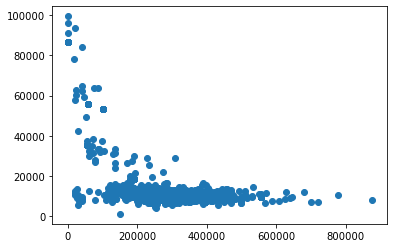

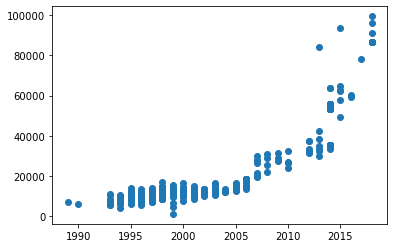

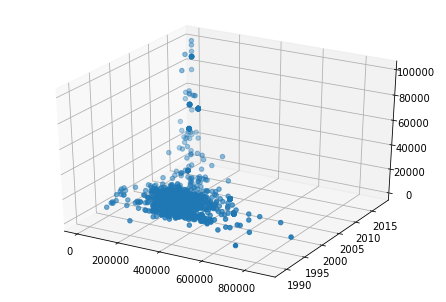

In [6]:
# visualization part 1
yurush = load_data["Yurush"].map(lambda x: x.rstrip('km').replace(' ', '')).map(int)

bur_ili = load_data["Buraxilish ili"]

qiymet = load_data["Qiymet"].map(lambda x: float(x.rstrip('$'))*1.7 if '$' in x else float(x.rstrip('AZN')))

yurush_saved = yurush
bur_ili_saved = bur_ili
qiymet_saved = qiymet

plt.figure()
plt.scatter(yurush, qiymet)

plt.figure()
plt.scatter(bur_ili, qiymet)

ax = Axes3D(plt.figure())
ax.scatter(yurush, bur_ili, qiymet)

plt.show()

In [8]:
yurush = (yurush - yurush.mean()) / yurush.std()
bur_ili = (bur_ili - bur_ili.mean()) / bur_ili.std()
qiymet = (qiymet - qiymet.mean()) / qiymet.std()

m = len(yurush)
x0 = np.ones(m)
x = np.array([x0, yurush, bur_ili]).T
theta = np.array([2, 3, 0])

alpha = 0.001


def costFunction (x, y, theta):
    m = len(y)
    J= (np.sum(((x.dot(theta))-y)**2))/(2*m)
    return J

print (costFunction(x, qiymet, theta))

8.697154397235645


In [4]:
def gradDescent(x, y, theta, alpha, it):
    cost_history = [0] * it  # creates array of 0s
    m = len(y)

    for it in range(it):
        if it % 1000 == 0:
            print("iteration #%d" % it)
            print(costFunction(x, y, theta))

        theta = theta - alpha * (x.T.dot((x.dot(theta)) - y) / m)

        cost = costFunction(x, y, theta)
        cost_history[it] = cost

        

    return theta, cost_history


new_theta, cost_history = gradDescent(x, qiymet, theta, alpha, 10000)



iteration #0
8.697154397235645
iteration #1000
0.8704783800615864
iteration #2000
0.2526359191305009
iteration #3000
0.15338168740704683
iteration #4000
0.1245516942287373
iteration #5000
0.11374417008486284
iteration #6000
0.10933810891246132
iteration #7000
0.10749357506692568
iteration #8000
0.10671487112488542
iteration #9000
0.10638524652761919


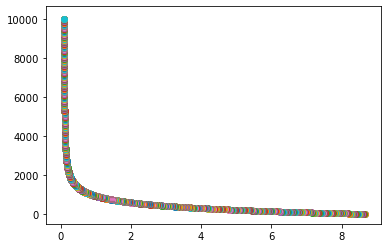

In [10]:
for i in range(10000):
    plt.scatter(cost_history[i], i )
plt.show()

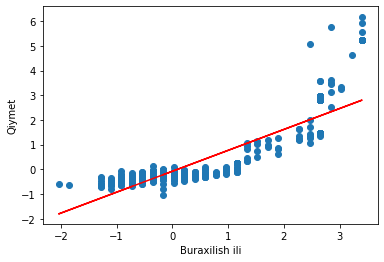

In [23]:
plt.figure()
plt.scatter(bur_ili, qiymet)
plt.xlabel("Buraxilish ili")
plt.ylabel("Qiymet")
prediction = new_theta[2]*bur_ili  + new_theta[1]
plt.plot(bur_ili, prediction, 'r')
plt.show()

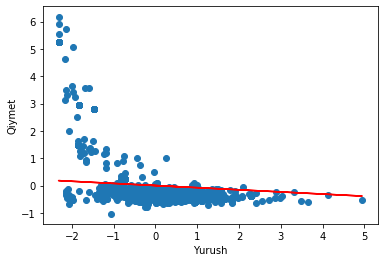

In [34]:
plt.figure()
plt.scatter(yurush, qiymet)
plt.xlabel("Yurush")
plt.ylabel("Qiymet")
prediction = new_theta[1]*yurush + new_theta[0]
plt.plot(yurush, prediction, 'r')
plt.show()

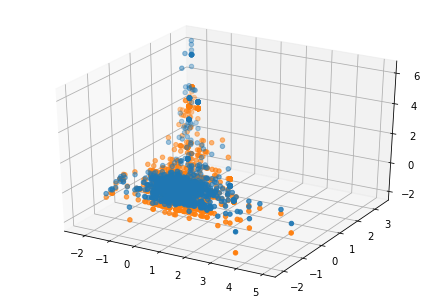

In [24]:
ax = Axes3D(plt.figure())
ax.scatter(yurush, bur_ili, qiymet)
pred=new_theta[2]*bur_ili + new_theta[1]*yurush + new_theta[0]
ax.scatter(yurush, bur_ili, pred, 'r')
plt.show()

In [9]:
yurush1 = 240000
buraxilish1 = 2000
qiymet1 = 11500

yurush1 = (yurush1 - yurush_saved.mean()) / yurush_saved.std()
buraxilish1 = (buraxilish1 - bur_ili_saved.mean()) / bur_ili_saved.std()
qiymet1 = (qiymet1 - qiymet_saved.mean()) / qiymet_saved.std()
pred1 = new_theta[2] * buraxilish1 + new_theta[1] * yurush1 + new_theta[0]

p1= pred1*qiymet_saved.std() + qiymet_saved.mean()
q1 = qiymet1*qiymet_saved.std() + qiymet_saved.mean()

print(p1, ' ', q1)

15757.665198135957   11500.0


In [11]:
yurush2 = 415558
buraxilish2 = 1996
qiymet2 = 8800

yurush2 = (yurush2 - yurush_saved.mean()) / yurush_saved.std()
buraxilish2 = (buraxilish2 - bur_ili_saved.mean()) / bur_ili_saved.std()
qiymet2 = (qiymet2 - qiymet_saved.mean()) / qiymet_saved.std()
pred2 = new_theta[2] * buraxilish2 + new_theta[1] * yurush2 + new_theta[0]

p2= pred2*qiymet_saved.std() + qiymet_saved.mean()
q2 = qiymet2*qiymet_saved.std() + qiymet_saved.mean()

print(p2, ' ', q2)

5539.695576839145   8800.0
